In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
from pathlib import Path

## Plot 2D heatmap

In [2]:
def plot_lattice(filename, savepath=None):
    lattice = np.loadtxt(filename)

    fig, ax = plt.subplots(figsize=(6, 6))

    im = ax.imshow(
        lattice,
        cmap="bwr",
        origin="lower",
        vmin=-1,
        vmax=1,
        interpolation="nearest",
        aspect="equal"
    )

    # Improved title and labels
    # ax.set_title("2D Ising Lattice", fontsize=16, pad=12)
    ax.set_xlabel("y", fontsize=16)
    ax.set_ylabel("x", fontsize=16)

    ax.tick_params(axis='both', labelsize=14)

    # Shorter, cleaner colorbar
    cbar = fig.colorbar(im, ax=ax, shrink=0.70, pad=0.02)
    cbar.set_label("Spin value", fontsize=15)
    cbar.ax.tick_params(labelsize=11)

    fig.tight_layout()

    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches="tight")

    plt.show()


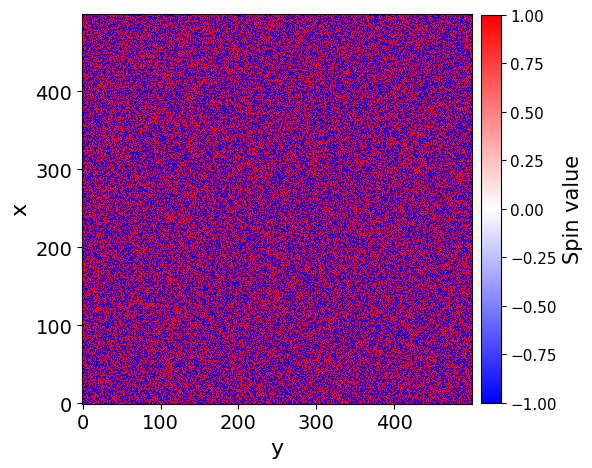

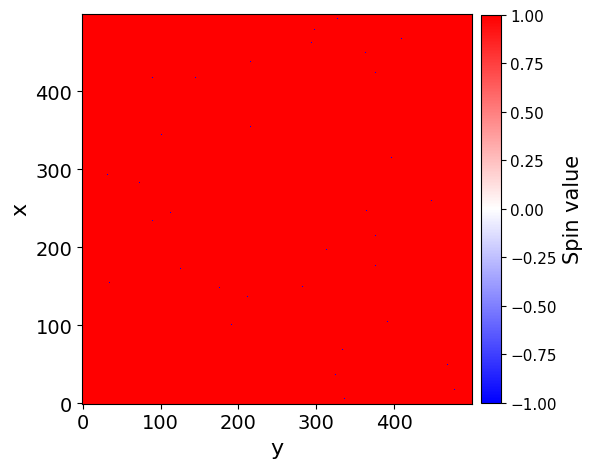

In [3]:
plot_lattice("data_500_1000/ising_J0.735_h1.286_T1.000_Lx500_Ly500_MC0_type3.dat", savepath="img/ising_lattice_initial.png")
plot_lattice("data_500_1000/ising_J0.735_h1.286_T1.000_Lx500_Ly500_MC10000000_type3.dat", savepath="img/ising_lattice_final.png")

# Magnetization plots

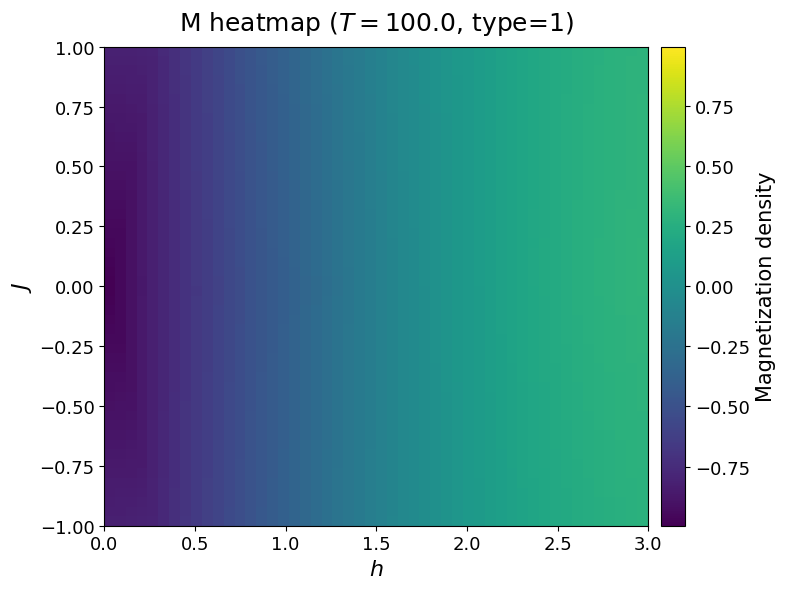

In [4]:
# Read the magnetization csv file
L = 1000
T = 100.0
type = 1

filename = f"data/magnetization{L}_{L}_T{T}00_type{type}.csv"
magnetization = pd.read_csv(filename)

heatmap_df = magnetization.pivot(
    index="J",
    columns="h",
    values="magnetization_density"
).T

fig, ax = plt.subplots(figsize=(8, 6))

# If magnetization can be positive and negative, center colormap at 0
vmax = np.abs(heatmap_df.values).max()

im = ax.imshow(
    heatmap_df.values,
    origin="lower",
    aspect="auto",
    extent=[
        heatmap_df.columns.min(),
        heatmap_df.columns.max(),
        heatmap_df.index.min(),
        heatmap_df.index.max()
    ],
    cmap="viridis",          # Diverging colormap for signed magnetization
    vmin=-vmax,
    vmax=vmax,
    interpolation="nearest"
)

# Improved labels and title
ax.set_xlabel(r"$h$", fontsize=16)
ax.set_ylabel(r"$J$", fontsize=16)
ax.set_title(
    rf"M heatmap ($T={T}$, type={type})",
    fontsize=18,
    pad=12
)

ax.tick_params(axis='both', labelsize=13)

# Shorter and tighter colorbar
cbar = fig.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.set_label("Magnetization density", fontsize=15)
cbar.ax.tick_params(labelsize=13)

fig.tight_layout()
plt.show()


# Data Analysi

In [5]:
def load_and_merge_csv(folder_path, ignore = None):
    """
    Load all .csv files in a folder and merge them into a single DataFrame.

    Parameters
    ----------
    folder_path : str or Path
        Path to the folder containing CSV files.

    Returns
    -------
    pd.DataFrame
        Concatenated DataFrame.
    """
    folder = Path(folder_path)
    csv_files = sorted(folder.glob("*.csv"))

    if not csv_files:
        raise ValueError(f"No CSV files found in {folder}")

    if ignore is not None:
        csv_files = [f for f in csv_files if ignore not in f.name]

    dfs = [pd.read_csv(f) for f in csv_files]
    df_merged = pd.concat(dfs, ignore_index=True)

    return df_merged

In [6]:
folder = "results"
fname = "ising_results_20260206_161554new.csv"

df = load_and_merge_csv(folder, fname)
df

,backend,L,init_type,J,h,T,n_steps,E,e_density,m,m_density,init_time,mh_time,mh_time_per_step
0,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,1.000000,0.000010,0.039684,3.968400e-07
1,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,1.000000,0.000008,0.039670,3.967000e-07
2,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,1.000000,0.000007,0.039665,3.966500e-07
3,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,1.000000,0.000007,0.039659,3.965900e-07
4,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,1.000000,0.000007,0.039658,3.965800e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10694,gpu_eff_1Dthreads,16,random,1.0,1.0,10.0,100000,-130.0,-0.507812,58.0,0.226562,0.000080,0.024793,2.483273e-07
10695,gpu_eff_1Dthreads,16,random,1.0,2.0,0.5,100000,-1024.0,-4.000000,256.0,1.000000,0.000083,0.024649,2.468850e-07
10696,gpu_eff_1Dthreads,16,random,1.0,2.0,0.5,100000,-1024.0,-4.000000,256.0,1.000000,0.000080,0.024713,2.475260e-07
10697,gpu_eff_1Dthreads,16,random,1.0,2.0,0.5,100000,-1024.0,-4.000000,256.0,1.000000,0.000076,0.024879,2.491887e-07


Group the time results avereging on the same backend, L, init_type, J, h, T, n_steps

In [7]:
def plot_avg_performance(
    df: pd.DataFrame,
    *,
    L=None,
    T=None,
    J=None,
    h=None,
    init_type=None,
    n_steps=None,
    metric="mh_time_per_step",
    backends=("cpu_1", "cpu_openmp", "gpu", "gpu_efficient", "gpu_eff_1Dthreads"),
    logy=True,
):
    """
    Plot average performance for selected parameters, grouped by backend.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    L, T, J, h, init_type, n_steps : optional
        If provided, filter dataframe by these values.
    metric : str
        Column to average and plot (default: 'mh_time_per_step').
    backends : tuple
        Backends to include.
    logy : bool
        Use logarithmic y-scale.
    """

    # --- filtering ---
    mask = pd.Series(True, index=df.index)

    if L is not None:
        mask &= df["L"] == L
    if T is not None:
        mask &= df["T"] == T
    if J is not None:
        mask &= df["J"] == J
    if h is not None:
        mask &= df["h"] == h
    if init_type is not None:
        mask &= df["init_type"] == init_type
    if n_steps is not None:
        mask &= df["n_steps"] == n_steps

    df_filt = df.loc[mask & df["backend"].isin(backends)]

    if df_filt.empty:
        raise ValueError("No data left after filtering.")

    # --- aggregation ---
    avg = (
        df_filt
        .groupby("backend", sort=False)[metric]
        .mean()
        .reindex(backends)
    )

    # --- plotting ---
    plt.figure(figsize=(7, 4))
    avg.plot(kind="bar")

    plt.ylabel(f"Average {metric}")
    plt.xlabel("Backend")

    title_parts = []
    for name, val in [("L", L), ("T", T), ("J", J), ("h", h), ("init", init_type)]:
        if val is not None:
            title_parts.append(f"{name}={val}")

    if title_parts:
        plt.title(", ".join(title_parts))
    else:
        plt.title("Average performance by backend")

    if logy:
        plt.yscale("log")

    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

In [8]:
def filter_physical_energy_magnetization(df, tol=1e-6, verbose=True):
    df = df.copy()
    df["N"] = df["L"] * df["L"]

    # -----------------------------
    # 1. Absolute bounds
    # -----------------------------
    df["ok_m"] = np.abs(df["m"]) <= df["N"] + tol
    df["ok_md"] = np.abs(df["m_density"]) <= 1 + tol

    df["ok_E_density"] = np.abs(
        df["E"] - df["e_density"] * df["N"]
    ) <= tol*np.sqrt(df["N"])

    # -----------------------------
    # 2. Theoretical energy bounds
    # -----------------------------
    df["E_min"] = -2 * df["J"] * df["N"] - np.abs(df["h"]) * df["N"]
    df["E_max"] =  2 * df["J"] * df["N"] + np.abs(df["h"]) * df["N"]

    df["ok_E_bounds"] = (
        (df["E"] >= df["E_min"] - tol) &
        (df["E"] <= df["E_max"] + tol)
    )

    # -----------------------------
    # 3. HM equilibrium sanity check
    # Energy ↔ magnetization coherence
    # -----------------------------
    # Normalized quantities
    df["E_norm"] = (df["E"] - df["E_min"]) / (df["E_max"] - df["E_min"] + tol)
    df["m_abs"] = np.abs(df["m_density"])

    # If energy is very low → magnetization must be high
    low_E = df["E_norm"] < 0.2
    df["ok_lowE"] = True
    df.loc[low_E, "ok_lowE"] = df.loc[low_E, "m_abs"] > 0.3

    # If energy is very high → magnetization must be low
    high_E = df["E_norm"] > 0.8
    df["ok_highE"] = True
    df.loc[high_E, "ok_highE"] = df.loc[high_E, "m_abs"] < 0.7

    # -----------------------------
    # Final mask
    # -----------------------------
    checks = [
        "ok_m",
        "ok_md",
        "ok_E_density",
        "ok_E_bounds",
        "ok_lowE",
        "ok_highE",
    ]

    df["is_physical"] = df[checks].all(axis=1)

    df_clean = df[df["is_physical"]].copy()
    df_rejected = df[~df["is_physical"]].copy()

    if verbose:
        print("\n=== Energy & Magnetization Physical Filter ===")
        print(f"Total rows    : {len(df)}")
        print(f"Accepted      : {len(df_clean)}")
        print(f"Rejected      : {len(df_rejected)}")

        print("\nRejection causes:")
        for c in checks:
            n = (~df[c]).sum()
            if n > 0:
                print(f"  {c:14s}: {n}")

    return df_clean, df_rejected


In [9]:
df_clean, df_bad = filter_physical_energy_magnetization(df, 0.1)


=== Energy & Magnetization Physical Filter ===
Total rows    : 10699
Accepted      : 10669
Rejected      : 30

Rejection causes:
  ok_E_bounds   : 30


In [10]:
df_bad

,backend,L,init_type,J,h,T,n_steps,E,e_density,m,...,ok_md,ok_E_density,E_min,E_max,ok_E_bounds,E_norm,m_abs,ok_lowE,ok_highE,is_physical
1365,cpu_1,2560,all_up,1.0,1.0,0.5,100000,-20621992.0,-3.146666,6553600.0,...,True,True,-19660800.0,19660800.0,False,-0.024444,1.000000,True,True,False
1366,cpu_1,2560,all_up,1.0,1.0,0.5,100000,-20621992.0,-3.146666,6553600.0,...,True,True,-19660800.0,19660800.0,False,-0.024444,1.000000,True,True,False
1367,cpu_1,2560,all_up,1.0,1.0,0.5,100000,-20621992.0,-3.146666,6553600.0,...,True,True,-19660800.0,19660800.0,False,-0.024444,1.000000,True,True,False
1368,cpu_1,2560,all_up,1.0,1.0,0.5,100000,-20621992.0,-3.146666,6553600.0,...,True,True,-19660800.0,19660800.0,False,-0.024444,1.000000,True,True,False
1369,cpu_1,2560,all_up,1.0,1.0,0.5,100000,-20621992.0,-3.146666,6553600.0,...,True,True,-19660800.0,19660800.0,False,-0.024444,1.000000,True,True,False
1370,cpu_1,2560,all_up,1.0,1.0,2.0,100000,-20613568.0,-3.145381,6552376.0,...,True,True,-19660800.0,19660800.0,False,-0.024230,0.999813,True,True,False
1371,cpu_1,2560,all_up,1.0,1.0,2.0,100000,-20613036.0,-3.145300,6552288.0,...,True,True,-19660800.0,19660800.0,False,-0.024217,0.999800,True,True,False
1372,cpu_1,2560,all_up,1.0,1.0,2.0,100000,-20613304.0,-3.145341,6552332.0,...,True,True,-19660800.0,19660800.0,False,-0.024223,0.999807,True,True,False
1373,cpu_1,2560,all_up,1.0,1.0,2.0,100000,-20612520.0,-3.145221,6552214.0,...,True,True,-19660800.0,19660800.0,False,-0.024203,0.999788,True,True,False
1374,cpu_1,2560,all_up,1.0,1.0,2.0,100000,-20612716.0,-3.145251,6552248.0,...,True,True,-19660800.0,19660800.0,False,-0.024208,0.999794,True,True,False


In [11]:
df_clean

,backend,L,init_type,J,h,T,n_steps,E,e_density,m,...,ok_md,ok_E_density,E_min,E_max,ok_E_bounds,E_norm,m_abs,ok_lowE,ok_highE,is_physical
0,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,...,True,True,-640.0,640.0,True,0.000000,1.000000,True,True,True
1,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,...,True,True,-640.0,640.0,True,0.000000,1.000000,True,True,True
2,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,...,True,True,-640.0,640.0,True,0.000000,1.000000,True,True,True
3,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,...,True,True,-640.0,640.0,True,0.000000,1.000000,True,True,True
4,cpu_1,16,all_up,1.0,0.5,0.5,100000,-640.0,-2.500000,256.0,...,True,True,-640.0,640.0,True,0.000000,1.000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10694,gpu_eff_1Dthreads,16,random,1.0,1.0,10.0,100000,-130.0,-0.507812,58.0,...,True,True,-768.0,768.0,True,0.415338,0.226562,True,True,True
10695,gpu_eff_1Dthreads,16,random,1.0,2.0,0.5,100000,-1024.0,-4.000000,256.0,...,True,True,-1024.0,1024.0,True,0.000000,1.000000,True,True,True
10696,gpu_eff_1Dthreads,16,random,1.0,2.0,0.5,100000,-1024.0,-4.000000,256.0,...,True,True,-1024.0,1024.0,True,0.000000,1.000000,True,True,True
10697,gpu_eff_1Dthreads,16,random,1.0,2.0,0.5,100000,-1024.0,-4.000000,256.0,...,True,True,-1024.0,1024.0,True,0.000000,1.000000,True,True,True


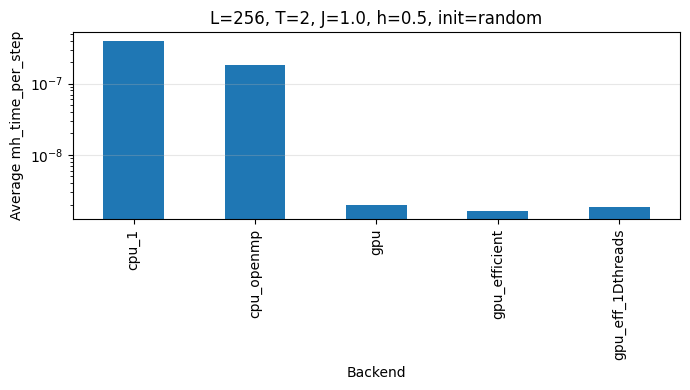

In [12]:
plot_avg_performance(
    df,
    L=256,
    T=2,
    J=1.0,
    h=0.5,
    init_type="random"
)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_time_vs_L(
    df: pd.DataFrame,
    *,
    T=None,
    J=None,
    h=None,
    init_type=None,
    n_steps=None,
    metric="mh_time_per_step",
    metric_label=None,
    backends=("cpu_1", "cpu_openmp", "gpu", "gpu_eff_1Dthreads", "gpu_efficient"),
    backend_labels=None,   
    error="sem",           # "std" or "sem"
    logx=False,
    logy=True,
):
    """
    Plot average time as a function of L with error bars, split by backend.
    """

    # -------------------------
    # Filtering
    # -------------------------
    mask = pd.Series(True, index=df.index)

    for name, val in [("T", T), ("J", J), ("h", h),
                      ("init_type", init_type), ("n_steps", n_steps)]:
        if val is not None:
            mask &= df[name] == val

    df_filt = df.loc[mask & df["backend"].isin(backends)]

    if df_filt.empty:
        raise ValueError("No data left after filtering.")

    # -------------------------
    # Aggregation
    # -------------------------
    grouped = (
        df_filt
        .groupby(["backend", "L"])[metric]
        .agg(["mean", "std", "count"])
        .reset_index()
    )

    if error == "sem":
        grouped["err"] = grouped["std"] / np.sqrt(grouped["count"])
    elif error == "std":
        grouped["err"] = grouped["std"]
    else:
        raise ValueError("error must be 'std' or 'sem'")

    # -------------------------
    # Plotting
    # -------------------------
    fig, ax = plt.subplots(figsize=(7.5, 4.5))

    for backend in backends:
        sub = grouped[grouped["backend"] == backend]
        if sub.empty:
            continue

        sub = sub.sort_values("L")

        label = backend
        if backend_labels and backend in backend_labels:
            label = backend_labels[backend]

        ax.errorbar(
            sub["L"],
            sub["mean"],
            yerr=sub["err"],
            marker="o",
            markersize=7,
            linewidth=1.5,
            capsize=3,
            label=label,
        )

    # -------------------------
    # Axes formatting
    # -------------------------
    ax.set_xlabel("L", fontsize=13)

    if metric_label is None:
        metric_label = metric

    ax.set_ylabel(metric_label, fontsize=13)

    ax.tick_params(axis='both', labelsize=11)

    if logx:
        ax.set_xscale("log")
    if logy:
        ax.set_yscale("log")

    ax.grid(True, which="both", linestyle="--", alpha=0.3)

    # -------------------------
    # Title
    # -------------------------
    title_parts = []
    for name, val in [("T", T), ("J", J), ("h", h), ("init", init_type)]:
        if val is not None:
            title_parts.append(f"{name}={val}")

    title = "Performance scaling with L"
    if title_parts:
        title += "\n" + ", ".join(title_parts)

    ax.set_title(title, fontsize=15, pad=10)

    ax.legend(fontsize=10, frameon=False)

    fig.tight_layout()
    plt.show()


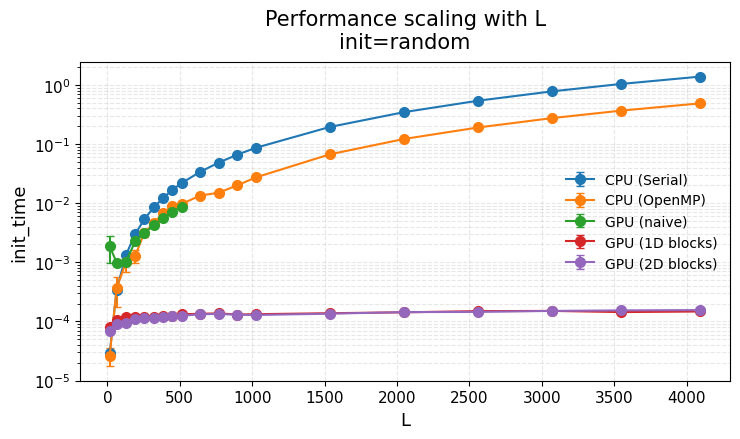

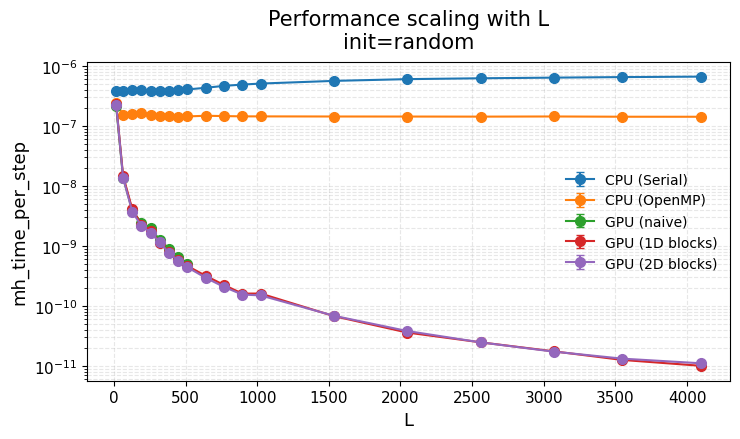

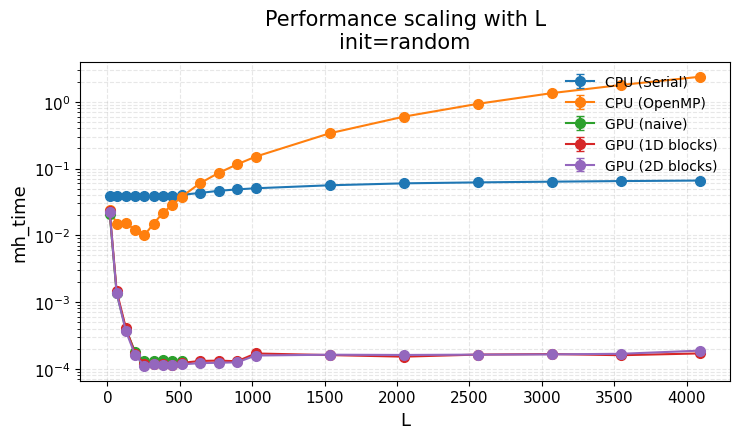

In [14]:
backend_labels = {
    "cpu_1": "CPU (Serial)",
    "cpu_openmp": "CPU (OpenMP)",
    "gpu": "GPU (naive)",
    "gpu_eff_1Dthreads": "GPU (1D blocks)",
    "gpu_efficient": "GPU (2D blocks)"
}

plot_time_vs_L(
    df,
    backend_labels=backend_labels,
    init_type="random",
    metric = "init_time", logy = True
)

plot_time_vs_L(
    df,
    backend_labels=backend_labels,
    init_type="random",
    metric = "mh_time_per_step",
    logy= True
)


plot_time_vs_L(
    df,
    backend_labels=backend_labels,
    init_type="random",
    metric = "mh_time",
    logy= True
)
